In [1]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np

/Users/arch/opt/anaconda3/envs/hml_project/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_tranforms = transforms.Compose([
        transforms.Pad(2),
        transforms.ToTensor(),
    ]
)

In [3]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=dataset_tranforms)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=dataset_tranforms)

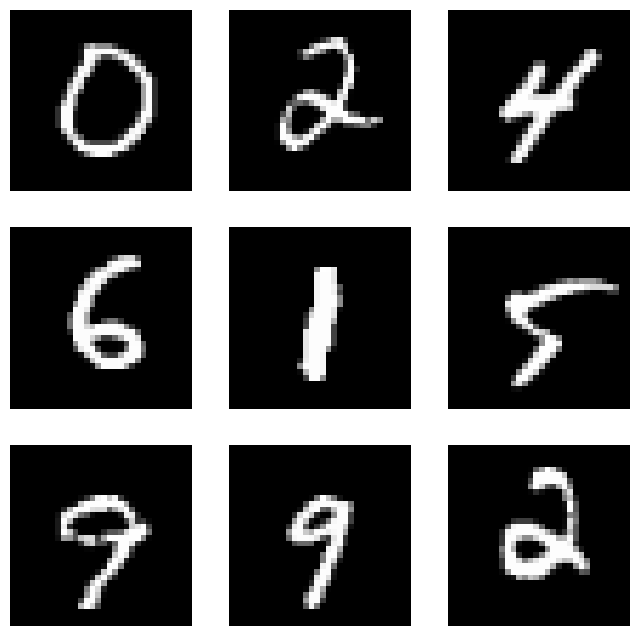

In [4]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_trainset), size=(1,)).item()
    img, label = mnist_trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
from data_loading import permute_train_test_data

In [12]:
training_permutations , test_permutations = permute_train_test_data(list(mnist_trainset)[:1000],mnist_testset[:1000])

NameError: name 'no_permute_train_test_data' is not defined

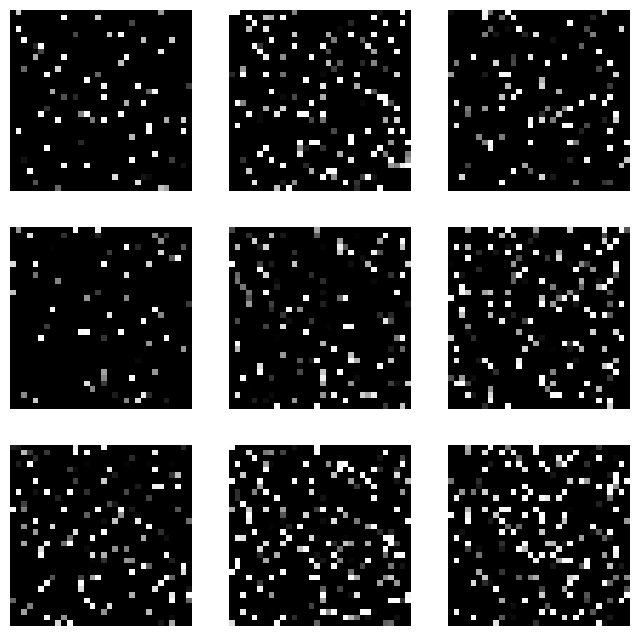

In [7]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_permutations[0]), size=(1,)).item()
    img, label = training_permutations[0][sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
from EWC_model import *
from train import * 

In [9]:
# -conv-layers
'''
        depth=depth,
        conv_type=args.conv_type if depth>0 else None,
        start_channels=args.channels if depth>0 else None,
        reducing_layers=args.rl if depth>0 else None,
        num_blocks=args.n_blocks if depth>0 else None,
        conv_bn=(True if args.conv_bn=="yes" else False) if depth>0 else None,
        conv_nl=args.conv_nl if depth>0 else None,
        no_fnl=True if depth>0 else None,
        global_pooling=checkattr(args, 'gp') if depth>0 else None,
'''
model = Classifier(
        image_size=32*32,
        image_channels=1,
        classes=10,
        # -fc-layers
        fc_units=400,
        fc_drop=0.2,
        fc_bn=True

    )

In [10]:
model.fisher_n = None
model.fisher_labels = 'all'
model.fisher_batch = 1
# -options relating to 'Offline EWC' (Kirkpatrick et al., 2017) and 'Online EWC' (Schwarz et al., 2018)
model.offline = True
model.weight_penalty = False
model.reg_strength = .5

In [14]:
train_cl(model, [list(mnist_trainset)[:1000]], iters=10000, batch_size=32)

context:   0%|          | 0/1 [00:00<?, ?it/s]

1


accuracy for iteration  0  : 0.0595703125


accuracy for iteration  100  : 0.0693359375


accuracy for iteration  200  : 0.0927734375


accuracy for iteration  300  : 0.0771484375


accuracy for iteration  400  : 0.0810546875


accuracy for iteration  500  : 0.0859375


accuracy for iteration  600  : 0.087890625


accuracy for iteration  700  : 0.0869140625


accuracy for iteration  800  : 0.080078125


accuracy for iteration  900  : 0.0625


accuracy for iteration  1000  : 0.0771484375


accuracy for iteration  1100  : 0.068359375


accuracy for iteration  1200  : 0.0712890625


accuracy for iteration  1300  : 0.0908203125


accuracy for iteration  1400  : 0.0712890625


context:   0%|          | 0/1 [03:25<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
import torch.nn as nn
input_layer = [] 
input_layer.append(nn.Linear(6, 1))
input_layer.append(nn.Sigmoid())
input_layer.append(nn.Linear(3, 5))
input_layer.append(nn.Sigmoid())